# 1. Time Series Decomposition

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Import the data

In [2]:
import pandas as pd
df = pd.read_csv('AirPassengers.csv', index_col='Month')
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


### Convert month to datetime format

In [3]:
df.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### Visualize above data

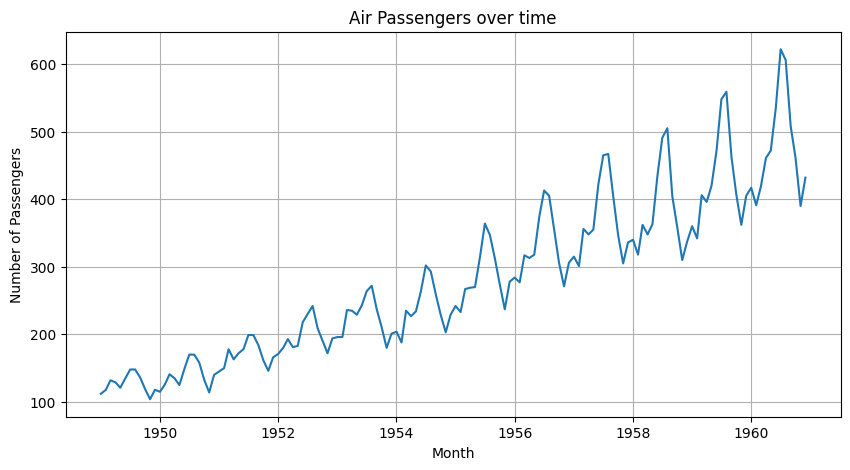

In [7]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.plot(df['Passengers'])
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Air Passengers over time')
plt.grid()
plt.show()

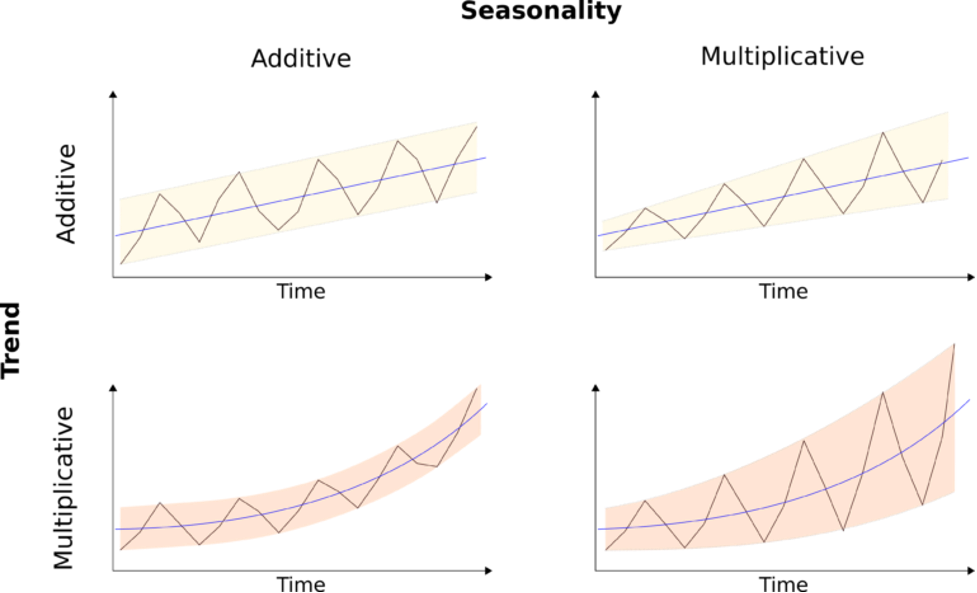

### Based on above I can use multiplicative model to decompose the above time series

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

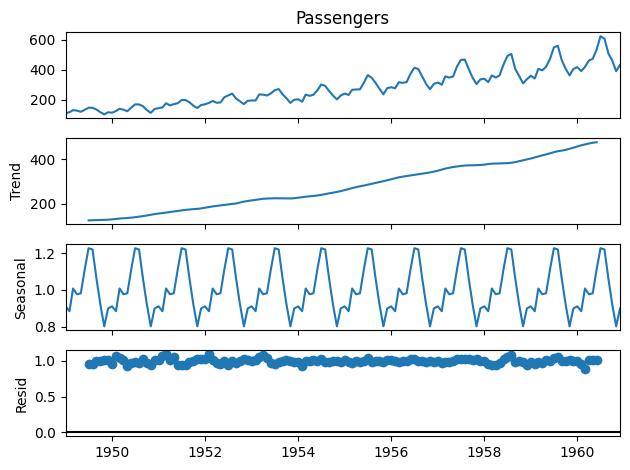

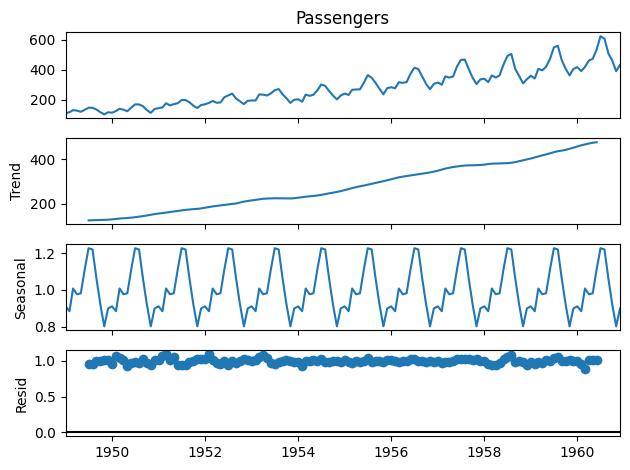

In [9]:
Q = seasonal_decompose(df['Passengers'], model='multiplicative')
Q.plot()

In [10]:
Q.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [11]:
Q.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [12]:
Q.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

In [13]:
Q.observed

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Passengers, Length: 144, dtype: float64

### Plotting series with Trend

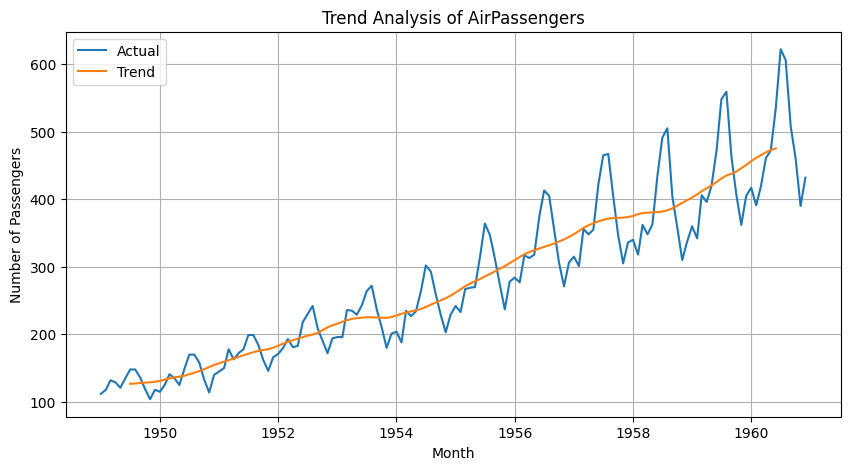

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(Q.observed, label='Actual')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Trend Analysis of AirPassengers')
plt.grid()
plt.legend()
plt.show()

### Plotting the seasonality

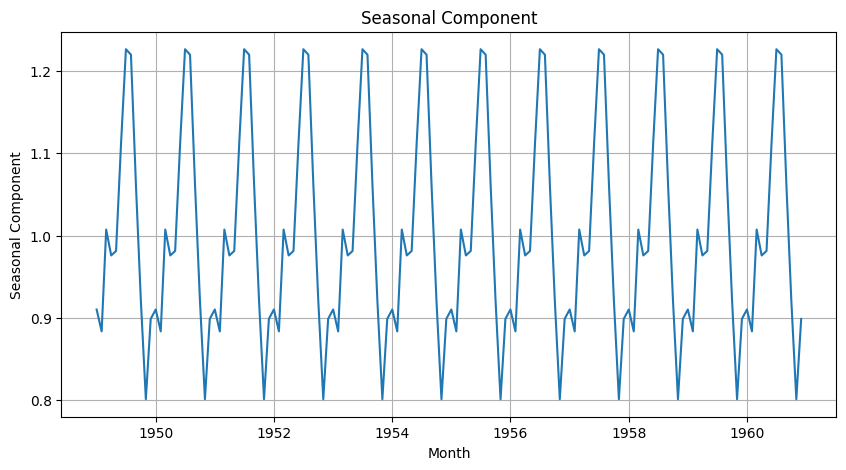

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(Q.seasonal)
plt.xlabel('Month')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Component')
plt.grid()
plt.show()

### Plot the residuals

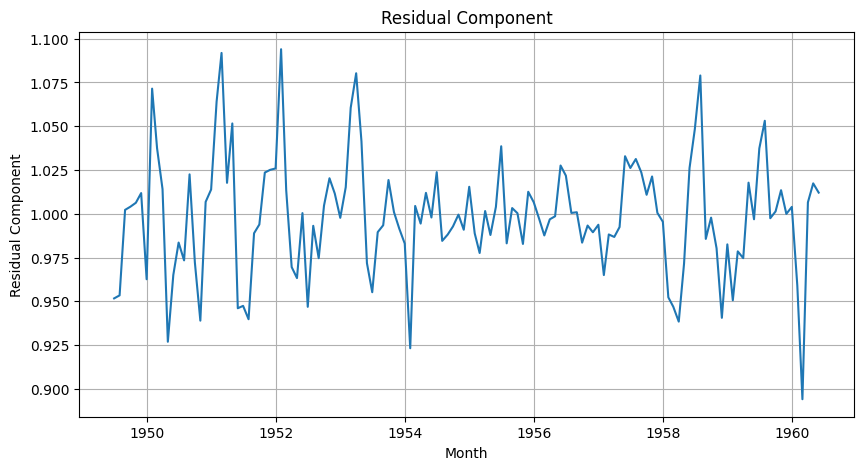

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(Q.resid)
plt.xlabel('Month')
plt.ylabel('Residual Component')
plt.title('Residual Component')
plt.grid()
plt.show()

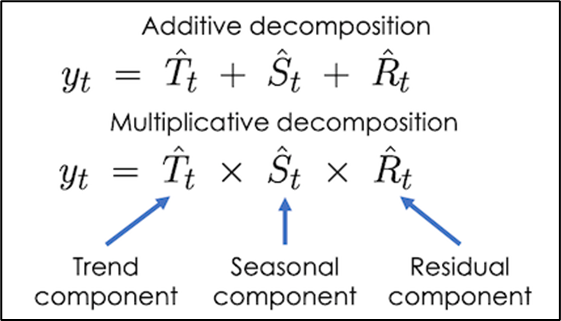

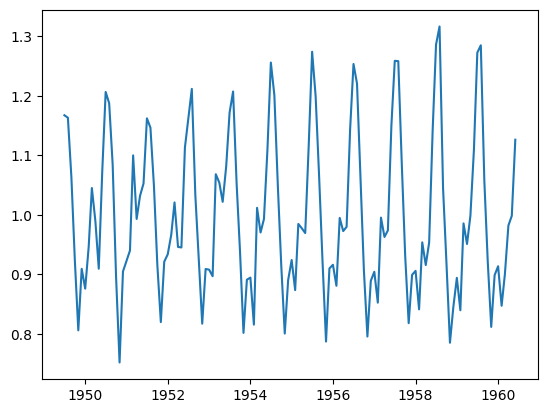

In [17]:
plt.plot(Q.observed/Q.trend)

### Time Series Decomposition is Done

### Time Series Forecasting

In [18]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Restart and run all cells

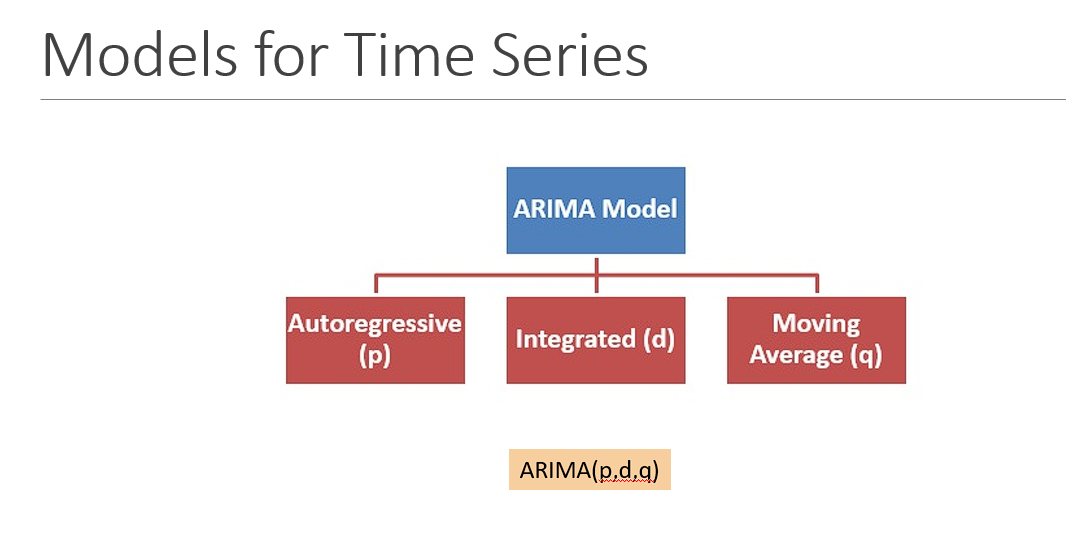

In [19]:
from pmdarima.arima import auto_arima

In [20]:
model = auto_arima(df['Passengers'], seasonal=True, m=12)

In [21]:
p, d, q = model.order

In [22]:
p

2

In [23]:
d

1

In [24]:
q

1

In [25]:
model.order

(2, 1, 1)

### Use above model to forecast the data next 3 years
(3 years = 3*12 = 36 months)

In [38]:
forecast, conf = model.predict(n_periods=48, return_conf_int=True)

In [39]:
forecast

1961-01-01    445.634934
1961-02-01    420.395042
1961-03-01    449.198378
1961-04-01    491.840023
1961-05-01    503.394565
1961-06-01    566.862550
1961-07-01    654.260284
1961-08-01    638.597604
1961-09-01    540.883864
1961-10-01    494.126748
1961-11-01    423.332841
1961-12-01    465.507712
1962-01-01    479.291026
1962-02-01    454.177037
1962-03-01    483.087203
1962-04-01    525.819493
1962-05-01    537.450950
1962-06-01    600.984197
1962-07-01    688.437307
1962-08-01    672.821614
1962-09-01    575.147743
1962-10-01    528.424456
1962-11-01    457.659254
1962-12-01    499.858481
1963-01-01    513.662462
1963-02-01    488.566008
1963-03-01    517.491053
1963-04-01    560.235969
1963-05-01    571.878138
1963-06-01    635.420475
1963-07-01    722.881298
1963-08-01    707.272149
1963-09-01    609.603831
1963-10-01    562.885256
1963-11-01    492.124052
1963-12-01    534.326671
1964-01-01    548.133530
1964-02-01    523.039519
1964-03-01    551.966636
1964-04-01    594.713311


In [40]:
conf

array([[423.34475094, 467.92511658],
       [394.23518302, 446.55490116],
       [419.83140846, 478.56534829],
       [460.37587373, 523.30417201],
       [470.37999658, 536.40913406],
       [532.69880168, 601.02629843],
       [619.22055901, 689.30000963],
       [602.87921604, 674.31599104],
       [504.63055231, 577.13717502],
       [457.44514984, 530.80834643],
       [386.3030106 , 460.36267117],
       [428.19044593, 502.82497842],
       [433.49653884, 525.08551376],
       [405.10774907, 503.24632483],
       [431.15437638, 535.02002912],
       [471.83916844, 579.79981805],
       [481.87209035, 593.02980929],
       [544.15500525, 657.81338881],
       [630.60709073, 746.26752372],
       [614.17741433, 731.46581272],
       [515.83056926, 634.46491613],
       [468.54219966, 588.30671331],
       [397.2952923 , 518.02321528],
       [439.07790127, 560.63906114],
       [446.32509131, 580.99983223],
       [418.31603539, 558.81598086],
       [444.62194643, 590.36015987],
 

In [41]:
df_forecast = forecast.to_frame()
df_forecast.columns = ['forecast']
df_forecast

,forecast
1961-01-01,445.634934
1961-02-01,420.395042
1961-03-01,449.198378
1961-04-01,491.840023
1961-05-01,503.394565
1961-06-01,566.862550
1961-07-01,654.260284
1961-08-01,638.597604
1961-09-01,540.883864
1961-10-01,494.126748


In [42]:
df_forecast[['Lower','Upper']] = conf

In [43]:
df_forecast

,forecast,Lower,Upper
1961-01-01,445.634934,423.344751,467.925117
1961-02-01,420.395042,394.235183,446.554901
1961-03-01,449.198378,419.831408,478.565348
1961-04-01,491.840023,460.375874,523.304172
1961-05-01,503.394565,470.379997,536.409134
1961-06-01,566.862550,532.698802,601.026298
1961-07-01,654.260284,619.220559,689.300010
1961-08-01,638.597604,602.879216,674.315991
1961-09-01,540.883864,504.630552,577.137175
1961-10-01,494.126748,457.445150,530.808346


In [44]:
df_forecast = df_forecast.apply(round)
df_forecast

,forecast,Lower,Upper
1961-01-01,446.0,423.0,468.0
1961-02-01,420.0,394.0,447.0
1961-03-01,449.0,420.0,479.0
1961-04-01,492.0,460.0,523.0
1961-05-01,503.0,470.0,536.0
1961-06-01,567.0,533.0,601.0
1961-07-01,654.0,619.0,689.0
1961-08-01,639.0,603.0,674.0
1961-09-01,541.0,505.0,577.0
1961-10-01,494.0,457.0,531.0


### Save above to csv

In [45]:
df_forecast.to_csv('Forecast.csv')

### Visualizing above forecast

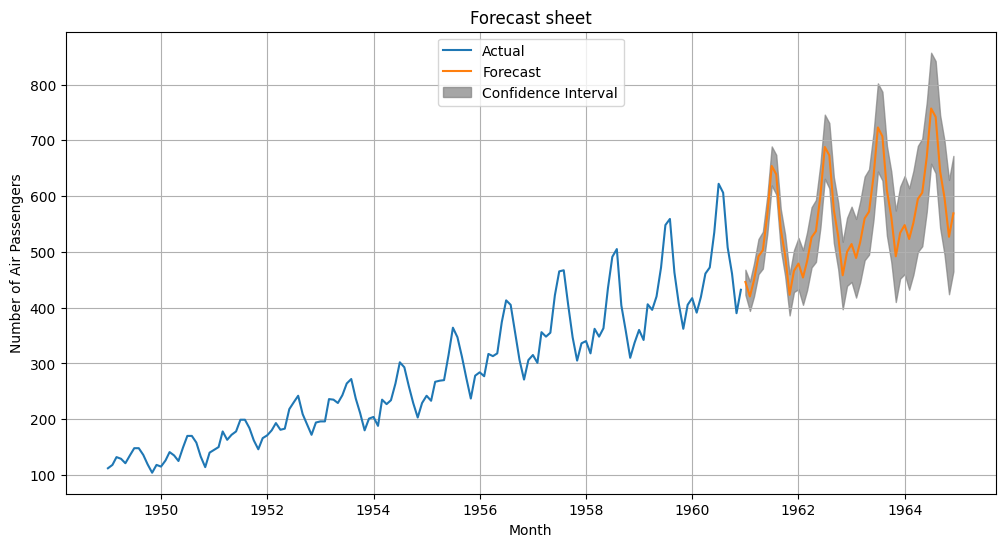

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Actual')
plt.plot(df_forecast['forecast'], label='Forecast')
plt.fill_between(df_forecast.index,
                 df_forecast['Lower'], df_forecast['Upper'],
                 alpha=0.7, color='gray',
                 label='Confidence Interval')
plt.xlabel('Month')
plt.ylabel('Number of Air Passengers')
plt.title('Forecast sheet')
plt.grid()
plt.legend(loc='upper center')
plt.show()